In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

# 데이터 셋 분석

데이터 셋은 activity에 대해  T_,RA_,LA,RL_,LL_ 로 나누고  x y z 각각의 acc,gyro,mag 에 대한 min,max,mean,var,std,skew 를 가짐

In [ ]:
df = pd.read_csv("DSA_features.csv")

In [ ]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [ ]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

activity는 19개를 가지며 각각 480개의 데이터를 가지고 있음

In [ ]:
df['activity'].value_counts()

,count
activity,
sitting,480
walkingTreadmillIncline,480
jumping,480
rowing,480
cyclingVertical,480
cyclingHorizontal,480
crossTrainer,480
stepper,480
runningTreadmill,480


Text(0, 0.5, 'Count')

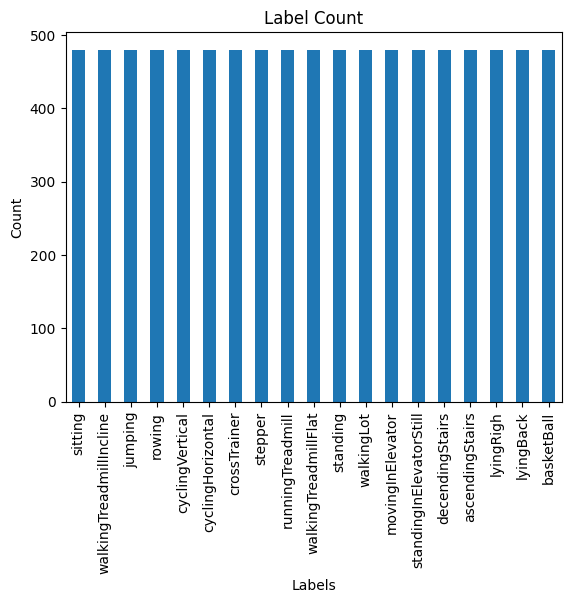

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 레이블별 갯수 확인
label_counts = df['activity'].value_counts()

# 바 그래프 그리기
label_counts.plot(kind='bar')

# 그래프 제목 및 라벨 설정
plt.title('Label Count')
plt.xlabel('Labels')
plt.ylabel('Count')

데이터 셋 중에 RA_ 와 LA_ 만을 모델에 사용하기 위해
df.filter를 사용

In [ ]:

df_RA = df.filter(regex='RA_')
df_LA = df.filter(regex='LA_')

In [ ]:
# activity를 4번째 인덱스에 삽입을 해주기
df_RA.insert(3, 'activity', df['activity'])

In [ ]:
df_LA.insert(3, 'activity', df['activity'])

In [ ]:
df_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,activity,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,sitting,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,sitting,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,sitting,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,sitting,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,sitting,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.690373,30.46300,-4.90150,basketBall,47.192912,6.869710,0.650080,2.187710,41.3410,-10.1410,...,-0.89670,0.177217,0.420971,1.232819,-0.120793,0.58641,-0.61373,0.077901,0.279107,0.611462
9116,6.477090,48.54700,-9.96820,basketBall,44.135927,6.643488,1.675812,5.845459,33.7910,-48.3200,...,-0.85305,0.158099,0.397617,1.560701,-0.133269,0.51707,-0.52776,0.058400,0.241661,0.574120
9117,6.309986,27.29900,-8.43140,basketBall,57.018917,7.551087,0.108921,6.342772,27.0570,-6.6706,...,-0.83512,0.126188,0.355229,1.598340,-0.567238,-0.14483,-0.82409,0.023408,0.152998,0.598665
9118,5.020496,30.16600,-20.25100,basketBall,67.001032,8.185416,0.157547,5.824265,27.6300,-19.8830,...,-0.87361,0.174494,0.417725,0.758435,0.211566,0.67931,-0.22328,0.060114,0.245181,0.316989


In [ ]:
df_LA

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,activity,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,sitting,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,sitting,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,sitting,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,sitting,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,sitting,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.834459,40.1640,-15.3980,basketBall,140.063928,11.834861,0.486128,-3.441297,39.7590,-53.6520,...,-0.87575,0.210911,0.459250,-0.421162,-0.529403,0.653000,-0.879310,0.123917,0.352018,1.813520
9116,6.647402,43.9160,-22.3060,basketBall,65.655140,8.102786,0.067916,-5.140474,26.7770,-41.9160,...,-0.77618,0.143162,0.378368,-1.307983,-0.466066,0.659650,-0.835960,0.167255,0.408968,1.483683
9117,3.108810,40.2770,-10.9500,basketBall,84.701543,9.203344,1.178224,-4.881662,43.4020,-27.3490,...,0.16648,0.035696,0.188933,-0.736037,-0.286489,0.632420,-0.837640,0.109532,0.330956,0.502392
9118,5.141190,68.5920,-43.1120,basketBall,137.860050,11.741382,1.219670,-3.365847,23.6960,-34.5820,...,-0.85130,0.205452,0.453268,0.171353,-0.567578,0.264780,-0.854420,0.059971,0.244890,1.467799


In [ ]:
df_LA['activity'].value_counts()

,count
activity,
sitting,480
walkingTreadmillIncline,480
jumping,480
rowing,480
cyclingVertical,480
cyclingHorizontal,480
crossTrainer,480
stepper,480
runningTreadmill,480


In [ ]:
df_RA['activity'].value_counts()

,count
activity,
sitting,480
walkingTreadmillIncline,480
jumping,480
rowing,480
cyclingVertical,480
cyclingHorizontal,480
crossTrainer,480
stepper,480
runningTreadmill,480


#데이터 전처리
```



target data 인 'activity'가 수치형 데이터가 아닌 범주형 데이터 이므로 변환하는 과정이 필요 -> LabelEncoder 를 이용함, fit_transform() 메서드 활용하기

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])

<ipython-input-14-191020e0a3e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])
<ipython-input-14-191020e0a3e0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


결과를 확인하면 19개의 수치형 데이터로 변환된것을 알수 있음.

In [ ]:
df_LA['activity'].value_counts()

,count
activity,
12,480
18,480
6,480
10,480
4,480
3,480
2,480
15,480
11,480


In [ ]:
df_RA['activity'].value_counts()

,count
activity,
12,480
18,480
6,480
10,480
4,480
3,480
2,480
15,480
11,480


RA_ 데이터에서 input인 X 와 target 인 Y로 분리해주기

In [ ]:
df_RA_Y=df_RA['activity']

In [ ]:
df_RA_X=df_RA.drop('activity',axis=1)
df_RA_X.head()

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,0.003779,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,0.001132,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,0.000488,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,0.001423,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,0.000471,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907


sklearn의 train_test_split을 활용하여 x_train,x_test, y_train,y_test로 분할

In [ ]:
from sklearn.model_selection import train_test_split

X_train_RA, X_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_X,
                                                    df_RA_Y,
                                                    test_size = 0.25,
                                                    random_state = 21)

In [ ]:
df_LA_Y = df_LA['activity']
df_LA_Y.head()

,activity
0,12
1,12
2,12
3,12
4,12


In [ ]:
df_LA_X=df_LA.drop('activity',axis=1)
df_LA_X.head()

,LA_xacc_mean,LA_xacc_max,LA_xacc_min,LA_xacc_var,LA_xacc_std,LA_xacc_skew,LA_yacc_mean,LA_yacc_max,LA_yacc_min,LA_yacc_var,...,LA_ymag_min,LA_ymag_var,LA_ymag_std,LA_ymag_skew,LA_zmag_mean,LA_zmag_max,LA_zmag_min,LA_zmag_var,LA_zmag_std,LA_zmag_skew
0,3.403317,3.4875,3.2682,0.001583,0.039790,-0.744647,-8.375713,-8.2927,-8.4821,0.001178,...,0.33748,0.000003,0.001810,-0.215069,0.072273,0.076374,0.067940,0.000004,0.001910,-0.166015
1,3.427302,3.6630,3.3168,0.004305,0.065614,1.000107,-8.397591,-8.3118,-8.5017,0.001098,...,0.33000,0.000017,0.004159,-0.611251,0.074557,0.085184,0.068169,0.000022,0.004643,0.717286
2,3.400870,3.5168,3.3315,0.001007,0.031732,0.978319,-8.439138,-8.3599,-8.5204,0.000684,...,0.33307,0.000002,0.001316,-0.506255,0.075852,0.083227,0.072507,0.000004,0.002106,1.043919
3,3.391002,3.5311,3.2608,0.001792,0.042328,0.117935,-8.441421,-8.3207,-8.5446,0.001862,...,0.33431,0.000002,0.001395,0.155251,0.074878,0.080059,0.069942,0.000006,0.002414,0.242524
4,3.359974,3.4434,3.3069,0.000633,0.025160,1.051627,-8.454854,-8.3202,-8.5561,0.001061,...,0.33631,0.000001,0.001005,-0.299017,0.073398,0.077461,0.070175,0.000002,0.001482,0.606258


LA_ 도 마찬가지로 train,test 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train_LA, X_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_X,
                                                    df_LA_Y,
                                                    test_size = 0.25,
                                                    random_state = 21)

In [ ]:
X_train_RA.shape, X_test_RA.shape, y_train_RA.shape, y_test_RA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

In [ ]:
X_train_LA.shape, X_test_LA.shape, y_train_LA.shape, y_test_LA.shape

((6840, 54), (2280, 54), (6840,), (2280,))

# LSTM 모델을 위한 데이터 전처리

이 데이터는 시계열 데이터 인듯 --> 신체 움직임 데이터를 다루는 거같은데 센서에서 측정된 값은 시간순으로 수집됨 -> 아까 맨처음에 데이터를 보면 people이라는 열이 존재했음을 통해 알 수 있음

득정 길이의 시퀀스(입력)과 그에 대한 레이블(출력)을 생성하기 위한 코드  시퀀스 데이터를 n_steps 길이로 나눔

In [ ]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)

        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]

        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가

    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [ ]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_RA = np.array(y_train_RA)
train_set_RA = np.c_[X_train_RA, y_train_array_RA]

y_test_array_RA = np.array(y_test_RA)
test_set_RA = np.c_[X_test_RA, y_test_array_RA]

In [ ]:
n_step = 3

X_train_seq_RA, y_train_seq_RA = split_sequences(train_set_RA, n_step)
print(X_train_seq_RA.shape, y_train_seq_RA.shape)

X_test_seq_RA, y_test_seq_RA = split_sequences(test_set_RA, n_step)
print(X_test_seq_RA.shape, y_test_seq_RA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


In [ ]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array_LA = np.array(y_train_LA)
train_set_LA = np.c_[X_train_LA, y_train_array_LA]

y_test_array_LA = np.array(y_test_LA)
test_set_LA = np.c_[X_test_LA, y_test_array_LA]

In [ ]:
n_step = 3

X_train_seq_LA, y_train_seq_LA = split_sequences(train_set_LA, n_step)
print(X_train_seq_LA.shape, y_train_seq_LA.shape)

X_test_seq_LA, y_test_seq_LA = split_sequences(test_set_LA, n_step)
print(X_test_seq_LA.shape, y_test_seq_LA.shape)

(6838, 3, 54) (6838,)
(2278, 3, 54) (2278,)


아까 범주형 데이터를 수치형 데이터(0-18)로 바꿔주었음 -> 이제는 이 정수형 데이터를 LSTM모델에서 쓰일 수 있게 원-핫 인코딩을 통해 0과1로 구성된 벡터로 변환시킨다

In [ ]:
from keras.utils import to_categorical

# Convert output variables to categorical for CNN
y_train_seq_RA = to_categorical(y_train_seq_RA)
print(y_train_seq_RA.shape)

y_test_seq_RA = to_categorical(y_test_seq_RA)
print(y_test_seq_RA.shape)

(6838, 19)
(2278, 19)


In [ ]:
# Convert output variables to categorical for CNN
y_train_seq_LA = to_categorical(y_train_seq_LA)
print(y_train_seq_LA.shape)

y_test_seq_LA = to_categorical(y_test_seq_LA)
print(y_test_seq_LA.shape)

(6838, 19)
(2278, 19)


In [ ]:
# Produce variables for CNN input/output shape
n_timesteps, n_features, n_outputs = X_train_seq_RA.shape[1], X_train_seq_RA.shape[2], y_train_seq_RA.shape[1]
print(n_timesteps, n_features, n_outputs)

3 54 19


# Model Import

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D


##RA_에 대한 훈련

In [ ]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model = Sequential()
model.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           2,451 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,659 (440.07 KB)

 Trainable params: 112,659 (440.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.2150 - loss: 2.5154 - val_accuracy: 0.5906 - val_loss: 1.3206
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6388 - loss: 1.1201 - val_accuracy: 0.7632 - val_loss: 0.8745
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7673 - loss: 0.7685 - val_accuracy: 0.7778 - val_loss: 0.7738
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8297 - loss: 0.5757 - val_accuracy: 0.8158 - val_loss: 0.6977
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8575 - loss: 0.4871 - val_accuracy: 0.8333 - val_loss: 0.6143
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8914 - loss: 0.3784 - val_accuracy: 0.8377 - val_loss: 0.6025
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9090 - loss: 0.3299 - val_accuracy: 0.8363 - val_loss: 0.6054
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9207 - loss: 0.2775 - val_accurac

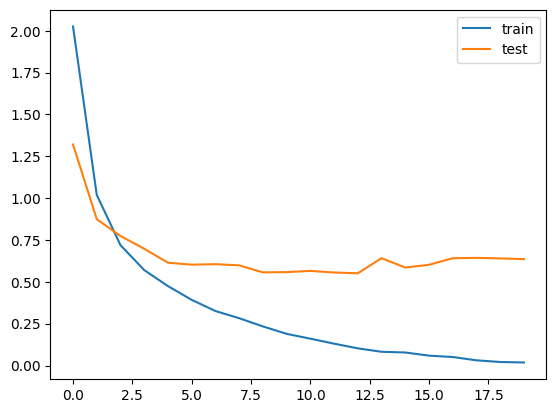

In [ ]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

train에 대한 정확도가 0.99 test에대한 정확도가 0.86 임 train_set에 과대적합이 되어버렸음

In [ ]:
model.evaluate(X_train_seq_RA, y_train_seq_RA)

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9982 - loss: 0.0188


[0.07634386420249939, 0.9856683015823364]

In [ ]:
model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8673 - loss: 0.6153


[0.616377592086792, 0.870061457157135]

confusion matrix 확인

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Confusion Matrix


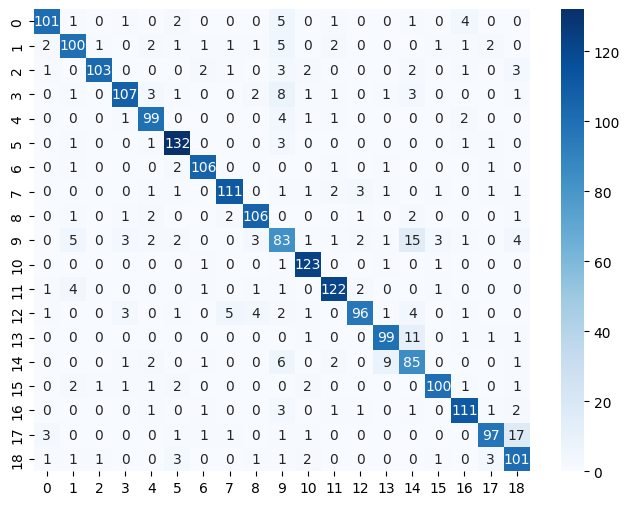

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model.predict(X_test_seq_RA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive

MyDrive


In [ ]:
base_loss,base_accuracy=model.evaluate(X_test_seq_RA, y_test_seq_RA)

model_file='/content/drive/MyDrive/RA_Model.h5'

tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8673 - loss: 0.6153


model saved at  /content/drive/MyDrive/RA_Model.h5
Accuracy >87.006146
Base Loss >0.62


## LA_ 에 대한 훈련

In [ ]:
# Build CNN model using keras. For model building suggestions, referenced:
# https://machinelearningmastery.com/deep-learning-models-for-human-activity-recognition/
# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/

# Sequential model type
model2 = Sequential()
model2.add(LSTM(units=128, input_shape = (n_timesteps,n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 19)                  │           2,451 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,659 (440.07 KB)

 Trainable params: 112,659 (440.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history2 = model2.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2188 - loss: 2.5270 - val_accuracy: 0.6111 - val_loss: 1.1943
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6540 - loss: 1.0505 - val_accuracy: 0.7719 - val_loss: 0.7844
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7882 - loss: 0.7111 - val_accuracy: 0.7851 - val_loss: 0.7191
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8234 - loss: 0.5763 - val_accuracy: 0.8275 - val_loss: 0.6168
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8678 - loss: 0.4410 - val_accuracy: 0.8465 - val_loss: 0.5508
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8832 - loss: 0.3859 - val_accuracy: 0.8509 - val_loss: 0.5481
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9082 - loss: 0.3151 - val_accuracy: 0.8523 - val_loss: 0.5286
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9255 - loss: 0.2609 - val_accuracy:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


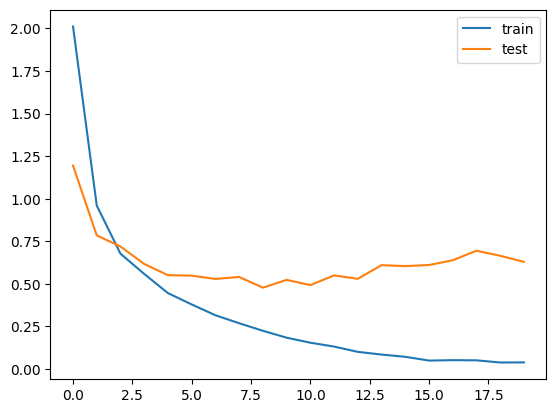

In [ ]:
plt.plot(history2.history["loss"], label = "train")
plt.plot(history2.history["val_loss"], label = "test")
plt.legend()

In [ ]:
model2.evaluate(X_train_seq_LA, y_train_seq_LA)

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9939 - loss: 0.0307


[0.08630240708589554, 0.9818660616874695]

In [ ]:
model2.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.5736


[0.599557101726532, 0.870061457157135]

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Confusion Matrix


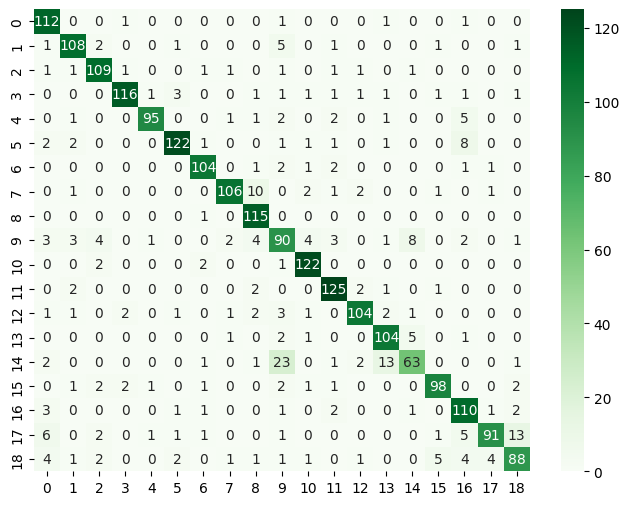

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_LA, axis=1)
Y_pred = np.argmax(model2.predict(X_test_seq_LA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

# 그래프 표시
plt.show()

LA_ 가중치 파일 저장하기

In [ ]:
base_loss,base_accuracy=model2.evaluate(X_test_seq_LA, y_test_seq_LA)

#model_file2='/content/drive/Mydrive/LA_Model.h5'
model_file2='/content/drive/MyDrive/LA_Model.h5'


tf.keras.models.save_model(model2, model_file2, include_optimizer=False)
print('model saved at ', model_file2)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8721 - loss: 0.5736


model saved at  /content/drive/MyDrive/LA_Model.h5
Accuracy >87.006146
Base Loss >0.60


# <font size="7">Pre-trained Model</font>

In [ ]:
# https://www.tensorflow.org/guide/keras/transfer_learning?hl=ko

경고가 뜨는 이유는 단순히 모델의 가중치와 구조만 저장되어있고 옵티마이저,손실함수,메트릭등은 함께 저장되지 않았기 때문에 발생함

In [ ]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file2)

따라서 컴파일 해주기

In [ ]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_LA, y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8721 - loss: 0.5736


[0.599557101726532, 0.870061457157135]

LA_ 에 대한 가중치 파일을 불러왔기때문에 RA_에 대한 테스트 데이터를 평가하면 정확도가 낮아짐

In [ ]:
base_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2438 - loss: 5.0736


[4.901819229125977, 0.2568042278289795]

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


In [ ]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(19, activation='softmax'))  # 예: 10개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,208 (430.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 110,208 (430.50 KB)

In [ ]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm_1, built=True>",lstm_1,False
1,"<Dense name=dense_2, built=True>",dense_2,False
2,"<Dense name=dense_4, built=False>",dense_4,True
3,"<Dense name=dense_5, built=False>",dense_5,True


In [ ]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3472 - loss: 2.2114 - val_accuracy: 0.4942 - val_loss: 1.5712
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5517 - loss: 1.4329 - val_accuracy: 0.5541 - val_loss: 1.3737
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5877 - loss: 1.2827 - val_accuracy: 0.5775 - val_loss: 1.3234
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6074 - loss: 1.2195 - val_accuracy: 0.5760 - val_loss: 1.3241
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6441 - loss: 1.1352 - val_accuracy: 0.6082 - val_loss: 1.2549
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6362 - loss: 1.1450 - val_accuracy: 0.6053 - val_loss: 1.2495
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6629 - loss: 1.0608 - val_accuracy: 0.5892 - val_loss: 1.2904
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6559 - loss: 1.0601 - val_accuracy: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 19)                  │           4,883 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,931 (874.73 KB)

 Trainable params: 37,907 (148.07 KB)

 Non-trainable params: 110,208 (430.50 KB)

 Optimizer params: 75,816 (296.16 KB)

정확도가 조금은 올라감!

In [ ]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6494 - loss: 1.1096


[1.1225959062576294, 0.647497832775116]

# <font size="7">Fine Tunning 미세 조정 </font>

In [ ]:
base_model.trainable = True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm_1, built=True>",lstm_1,True
1,"<Dense name=dense_2, built=True>",dense_2,True
2,"<Dense name=dense_4, built=True>",dense_4,True
3,"<Dense name=dense_5, built=True>",dense_5,True


In [ ]:
history3 = new_model.fit(X_train_seq_RA, y_train_seq_RA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7642 - loss: 0.7428 - val_accuracy: 0.7646 - val_loss: 0.8071
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8566 - loss: 0.4700 - val_accuracy: 0.7529 - val_loss: 0.7965
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8905 - loss: 0.3627 - val_accuracy: 0.8041 - val_loss: 0.6932
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9108 - loss: 0.2906 - val_accuracy: 0.7939 - val_loss: 0.7254
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9301 - loss: 0.2381 - val_accuracy: 0.8099 - val_loss: 0.7092
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9443 - loss: 0.1760 - val_accuracy: 0.8173 - val_loss: 0.6676
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9593 - loss: 0.1392 - val_accuracy: 0.8099 - val_loss: 0.7134
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9670 - loss: 0.1175 - val_accuracy:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 19)                  │           4,883 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 444,347 (1.70 MB)

 Trainable params: 148,115 (578.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 296,232 (1.13 MB)

In [ ]:
new_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8379 - loss: 0.9314


[0.9098153114318848, 0.8305531144142151]

# Pre_trained RA_ 를 가지고 LA_ 에 맞추기(실습)

1. pretrained model을 가져오는 과정이 필요하다.

In [ ]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

2. 컴파일되지 않은 모델의 구조와 가중치만 있는 상태이므로 컴파일을 해줘야 한다.

In [ ]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(X_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8673 - loss: 0.6153


[0.616377592086792, 0.870061457157135]

3. 이 모델에 LA_ 데이터를 평가해보면 어떤 결과가 나오는가 확인 -> 정확도 0.25 라는 결과

In [ ]:
base_model.evaluate(X_test_seq_LA,y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2505 - loss: 6.5408


[6.471083164215088, 0.24451273679733276]

4. 기존 모델은 신경망이 몇개의 층으로 구성되어 있나?

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  3


5. 현재 정확도가 매우 낮은 모델이므로 추가 학습을 시키던가 신경망 층을 더 늘려서 학습을 시켜봐야한다. base_model의 마지막 층은 제거하고 기존 층은 trainable=False로 두어 새로운 가중치를 학습하지 않게 하고 층을 구성해보자

In [ ]:
base_model.trainable = False

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 출력층부터 1개의 레이어를 삭제
new_model = remove_last_layers(base_model, 1)

# 새로운 출력층 추가
new_model.add(layers.Dense(256, activation='relu'))
new_model.add(layers.Dense(19, activation='softmax'))  #  19개의 클래스
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,208 (430.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 110,208 (430.50 KB)

built는 모델 또는 레이어가 컴파일되었거나 초기화되었는지 여부를 나타낸다. True이면 모델에서 이미 구성 및 초기화된 상태 False이면 아직 구성되지 않아 가중치나 다른 파라미터들이 설정이 안되어있음

In [ ]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm, built=True>",lstm,False
1,"<Dense name=dense, built=True>",dense,False
2,"<Dense name=dense_6, built=False>",dense_6,True
3,"<Dense name=dense_7, built=False>",dense_7,True


6. 훈련시키기

In [ ]:
history4 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)


Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3838 - loss: 2.0412 - val_accuracy: 0.5804 - val_loss: 1.2977
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5982 - loss: 1.2320 - val_accuracy: 0.5848 - val_loss: 1.2478
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6230 - loss: 1.1376 - val_accuracy: 0.6184 - val_loss: 1.1692
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6247 - loss: 1.1094 - val_accuracy: 0.6520 - val_loss: 1.1174
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6691 - loss: 0.9919 - val_accuracy: 0.6652 - val_loss: 1.0984
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6850 - loss: 0.9731 - val_accuracy: 0.6564 - val_loss: 1.0804
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6962 - loss: 0.9180 - val_accuracy: 0.6564 - val_loss: 1.0722
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7106 - loss: 0.8837 - val_accuracy: 0.

In [ ]:
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 19)                  │           4,883 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,931 (874.73 KB)

 Trainable params: 37,907 (148.07 KB)

 Non-trainable params: 110,208 (430.50 KB)

 Optimizer params: 75,816 (296.16 KB)

7. 정확도가 0.8까지 늘었다. 테스트 세트에 대해서 평가해보기

In [ ]:
new_model.evaluate(X_test_seq_LA,y_test_seq_LA)

# 정확도 0.7이 나옴

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6788 - loss: 1.0424


[1.0530521869659424, 0.6663740277290344]

8. train test에 대해 정확도를 보면 과대적합도 과소적합도 됬다고 말 할 수도 없는 낮은 성능이다. -> 추가적인 fine tunning 이 필요하다!

In [ ]:
# 기존층도 학습할수 있게 동결 해제하기
base_model.trainable = True

In [ ]:
# 컴파일하기
new_model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [ ]:
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm, built=True>",lstm,True
1,"<Dense name=dense, built=True>",dense,True
2,"<Dense name=dense_6, built=True>",dense_6,True
3,"<Dense name=dense_7, built=True>",dense_7,True


In [ ]:
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 19)                  │           4,883 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 148,115 (578.57 KB)

 Trainable params: 148,115 (578.57 KB)

 Non-trainable params: 0 (0.00 B)

9. 다시 학습시켜보자

In [ ]:
history5 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7825 - loss: 0.6425 - val_accuracy: 0.7544 - val_loss: 0.8518
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8616 - loss: 0.4337 - val_accuracy: 0.7939 - val_loss: 0.7466
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9049 - loss: 0.3109 - val_accuracy: 0.7939 - val_loss: 0.7135
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9295 - loss: 0.2417 - val_accuracy: 0.8202 - val_loss: 0.6970
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9356 - loss: 0.2011 - val_accuracy: 0.8056 - val_loss: 0.7426
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9495 - loss: 0.1620 - val_accuracy: 0.8289 - val_loss: 0.6871
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9597 - loss: 0.1356 - val_accuracy: 0.8289 - val_loss: 0.7252
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9643 - loss: 0.1163 - val_accur

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 19)                  │           4,883 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 444,347 (1.70 MB)

 Trainable params: 148,115 (578.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 296,232 (1.13 MB)

In [ ]:
new_model.evaluate(X_test_seq_LA,y_test_seq_LA)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8470 - loss: 0.8422


[0.8536683917045593, 0.8419666290283203]

10. 결론 : 훈련세트에 대해서는 정확도 99% 테스트 세트 데이터에서는 정확도 88%를 달성 -> 과대적합 되어버림

따라서 1) Dropout 층을 추가로 두거나 2) 뉴런 갯수를 256으로 했은데 좀 줄이거나 3) 교차검증 4) 조기종료 등이 있을 거 같다.

11. Dropout과 뉴런 갯수 조정하고 다시 학습해보기

In [ ]:
new_model = remove_last_layers(base_model, 1)


In [ ]:
new_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,208 (430.50 KB)

 Trainable params: 110,208 (430.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
new_model.add(Dropout(0.5))
new_model.add(layers.Dense(256,activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(layers.Dense(19,activation='softmax'))

In [ ]:
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
new_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,208 (430.50 KB)

 Trainable params: 110,208 (430.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history6 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2861 - loss: 2.5002 - val_accuracy: 0.8231 - val_loss: 0.6852
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7218 - loss: 0.9054 - val_accuracy: 0.8465 - val_loss: 0.6221
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8082 - loss: 0.6318 - val_accuracy: 0.8626 - val_loss: 0.5771
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8442 - loss: 0.5338 - val_accuracy: 0.8728 - val_loss: 0.5813
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8679 - loss: 0.4276 - val_accuracy: 0.8684 - val_loss: 0.5949
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8828 - loss: 0.4029 - val_accuracy: 0.8787 - val_loss: 0.5833
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8963 - loss: 0.3484 - val_accuracy: 0.8830 - val_loss: 0.6194
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8981 - loss: 0.3406 - val_accuracy:

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 19)                  │           4,883 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 444,347 (1.70 MB)

 Trainable params: 148,115 (578.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 296,232 (1.13 MB)

In [ ]:
new_model.evaluate(X_test_seq_LA,y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8864 - loss: 0.6667


[0.741380512714386, 0.877963125705719]

과대적합 문제는 어느정도 줄었지만 여전히 훈련과 테스트 세트 사이에 성능차이가 있는 거 같음

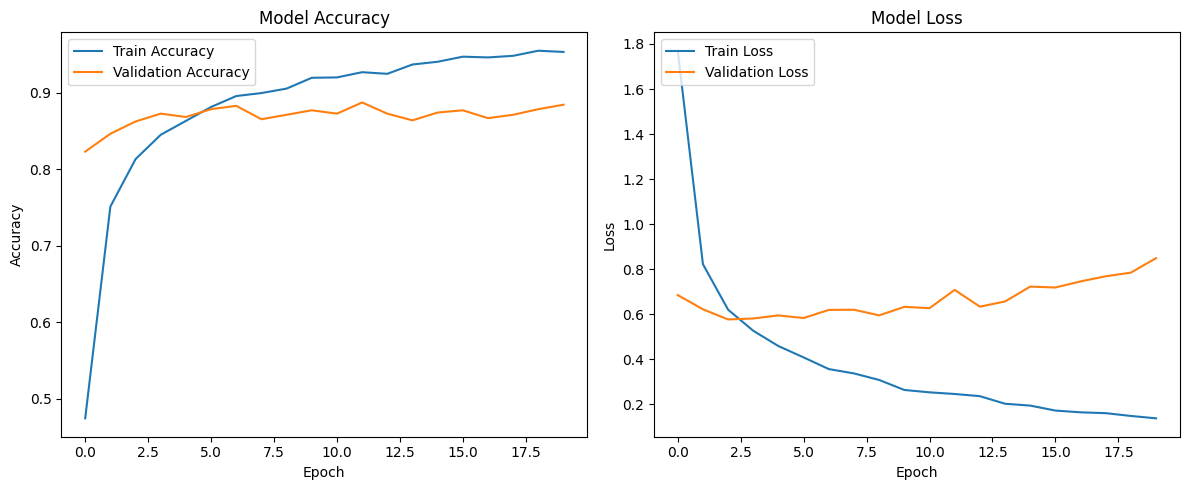

In [ ]:
import matplotlib.pyplot as plt

# Assuming `history` contains the training history from model.fit
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Run the function to plot history
plot_history(history6)


그래프를 보면 validation loss가 감소하다 다시 증가하는 것을 볼 수 있는데 이건 모델이 과대적합되기 시작한다는 얘기 -> 여전히 과대적합이 남아있는 듯함

trainable=True로 해보면?

In [ ]:
base_model.trainable = True
# 배치정규화 층까지 넣어보기
from tensorflow.keras.layers import BatchNormalization
new_model = remove_last_layers(base_model, 1)

new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
new_model.add(layers.Dense(128,activation='relu'))
new_model.add(BatchNormalization())
new_model.add(Dropout(0.5))
new_model.add(layers.Dense(19,activation='softmax'))

In [ ]:
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm, built=True>",lstm,True
1,"<Dense name=dense, built=True>",dense,True
2,"<BatchNormalization name=batch_normalization, ...",batch_normalization,True
3,"<Dropout name=dropout_2, built=False>",dropout_2,True
4,"<Dense name=dense_10, built=False>",dense_10,True
5,<BatchNormalization name=batch_normalization_1...,batch_normalization_1,True
6,"<Dropout name=dropout_3, built=False>",dropout_3,True
7,"<Dense name=dense_11, built=False>",dense_11,True


In [ ]:
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
new_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,208 (430.50 KB)

 Trainable params: 110,208 (430.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history7 = new_model.fit(X_train_seq_LA, y_train_seq_LA, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.4186 - loss: 2.2128 - val_accuracy: 0.8801 - val_loss: 0.5286
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8972 - loss: 0.3818 - val_accuracy: 0.8816 - val_loss: 0.5879
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9248 - loss: 0.2636 - val_accuracy: 0.8743 - val_loss: 0.6103
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9457 - loss: 0.1933 - val_accuracy: 0.8845 - val_loss: 0.6469
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9468 - loss: 0.1798 - val_accuracy: 0.8772 - val_loss: 0.7055
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9631 - loss: 0.1382 - val_accuracy: 0.8655 - val_loss: 0.7987
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9633 - loss: 0.1269 - val_accuracy: 0.8787 - val_loss: 0.7580
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9624 - loss: 0.1292 - val_accurac

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 19)                  │           2,451 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 389,563 (1.49 MB)

 Trainable params: 129,683 (506.57 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 259,368 (1013.16 KB)

In [ ]:
new_model.evaluate(X_test_seq_LA,y_test_seq_LA)
# 정확도가 90까지 늘기는 했다.

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9017 - loss: 0.6812


[0.7365491390228271, 0.892010509967804]